In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tienc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tienc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tienc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tienc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [5]:
# sử dụng tập dữ liệu  bbc_text_cls.csv
# Tập dữ liệu chứa các bài viết ngắn và nhãn phân loại của chúng
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
import requests

url = 'https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv'
filename = 'bbc_text_cls.csv'

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

print("Tải xong file:", filename)


Tải xong file: bbc_text_cls.csv


In [3]:
df = pd.read_csv(r'F:\python\AI\NLP\1_Vector-Models_and_Text_Preprocessing\dataset\bbc_text_cls.csv')


In [4]:
df.head()


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df.shape


(2225, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
inputs = df['text']
labels = df['labels']

<Axes: >

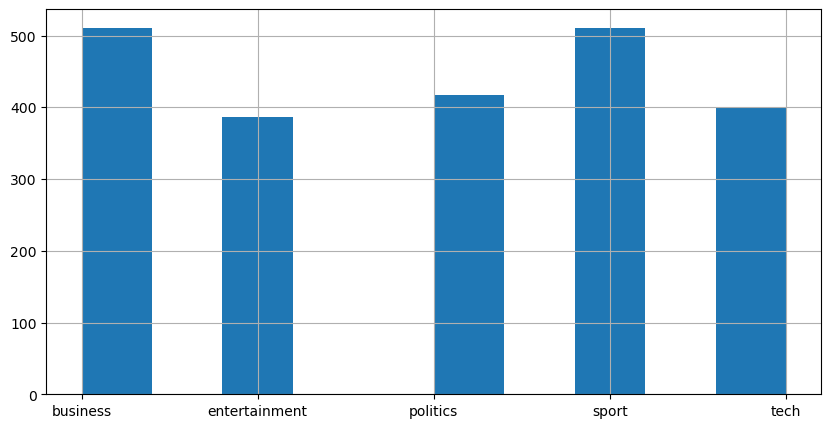

In [8]:
labels.hist(figsize=(10,5))

In [9]:
inputs_train, inputs_test, Ytrain , Ytest = train_test_split( inputs, labels, train_size=0.8,random_state=42)


In [10]:
# --- Cách 1: CountVectorizer Mặc định (Không tiền xử lý đặc biệt) ---
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

(Xtrain !=0).sum()
# What percentage of values are non-zero ?
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score : ' , model.score(Xtrain, Ytrain))
print('test score : ' , model.score(Xtest, Ytest))


train score :  0.9943820224719101
test score :  0.9730337078651685


In [25]:
def get_wordnet_pos(treebank_tag):
    """
    Ánh xạ Treebank POS tags sang WordNet POS tags
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # Mặc định là danh từ nếu không xác định được
        return wordnet.NOUN

In [ ]:
# --- Cách 2: CountVectorizer với Loại bỏ Stopwords ---
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score : ' , model.score(Xtrain, Ytrain))
print('test score : ' , model.score(Xtest, Ytest))

In [ ]:
# --- Cách 3: CountVectorizer với LemmaTokenizer ---
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
                for word, tag in words_and_tags]
    

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))



In [ ]:
# --- Cách 4: CountVectorizer với StemTokenizer ---
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
        
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]


# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))


In [ ]:
# --- Cách 5: CountVectorizer với Simple Split Tokenizer ---
def simple_tokenizer(s):
    return s.split()

vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))